In [139]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Part 1: Sales and Profitability Analysis

In [140]:
# Load the datasets
orders = pd.read_csv("C:/Users/eswar/Desktop/JAR/List_of_Orders_55FFC79CF8.csv")         
order_details = pd.read_csv("C:/Users/eswar/Desktop/JAR/Order_Details_19795F61CF.csv") 


In [141]:
merged_data = pd.merge(orders, order_details, on="Order ID", how="inner")
print("Merged Data Sample:")
print(merged_data.head())

Merged Data Sample:
  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  
0         7    Furniture         Bookcases  
1         5     Clothing             Stole  
2         3     Clothing       Hankerchief  
3         4  Electronics  Electronic Games  
4         2  Electronics            Phones  


In [142]:
merged_data.head(20)

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
5,B-25602,01-04-2018,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones
6,B-25602,01-04-2018,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
7,B-25602,01-04-2018,Pearl,Maharashtra,Pune,561.0,212.0,3,Clothing,Saree
8,B-25602,01-04-2018,Pearl,Maharashtra,Pune,119.0,-5.0,8,Clothing,Saree
9,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal,1355.0,-60.0,5,Clothing,Trousers


Total Sales (Amount) for each category

In [143]:
sales_by_category = merged_data.groupby("Category")["Amount"].sum().reset_index()


In [144]:
h=columns={"Amount": "Total_Sales"}

In [145]:
sales_by_category.rename(h, inplace=True)

print("\nTotal Sales by Category:")
print(sales_by_category)


Total Sales by Category:
      Category    Amount
0     Clothing  139054.0
1  Electronics  165267.0
2    Furniture  127181.0


Average Profit per Order for each category

In [146]:
profit_per_order = merged_data.groupby(["Order ID", "Category"])["Profit"].sum().reset_index()

In [147]:
avg_profit_by_category = profit_per_order.groupby("Category")["Profit"].mean().reset_index()

In [148]:
avg_profit_by_category.rename(columns={"Profit": "Avg_Profit_per_Order"}, inplace=True)

In [149]:
print(avg_profit_by_category)

      Category  Avg_Profit_per_Order
0     Clothing             28.404580
1  Electronics             51.441176
2    Furniture             12.354839


Total Profit Margin for each category

In [150]:
x={'Profit': 'sum', 'Amount': 'sum'}

In [151]:
profit_margin_by_category = merged_data.groupby("Category").agg(x).reset_index()

# formula 
profit_margin_by_category["Profit"] / profit_margin_by_category["Amount"] * 100



In [152]:
profit_margin_by_category["Profit_Margin"] = (profit_margin_by_category["Profit"] / profit_margin_by_category["Amount"]) * 100

In [153]:
print(profit_margin_by_category[["Category", "Profit_Margin"]])

      Category  Profit_Margin
0     Clothing       8.027817
1  Electronics       6.349725
2    Furniture       1.806874


Merge the above metrics

In [154]:
sales_profit_df = pd.merge(sales_by_category, avg_profit_by_category, on="Category")

In [155]:
sales_profit_df = pd.merge(sales_profit_df, profit_margin_by_category[["Category", "Profit_Margin"]], on="Category")

In [156]:
print(sales_profit_df)

      Category    Amount  Avg_Profit_per_Order  Profit_Margin
0     Clothing  139054.0             28.404580       8.027817
1  Electronics  165267.0             51.441176       6.349725
2    Furniture  127181.0             12.354839       1.806874


task-2

In [157]:
sales_target = pd.read_csv("C:/Users/eswar/Desktop/JAR/Sales_target_DD2E9B96A0.csv")# load 3rd data set

# Filter data for the Furniture category

In [158]:
furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()

In [159]:
furniture_target["Month of Order Date"] = pd.to_datetime(
    furniture_target["Month of Order Date"],
    format="%b-%y",
    errors="coerce"  # This will set any unconvertible dates to NaT
)


In [160]:
print(furniture_target.columns)

Index(['Month of Order Date', 'Category', 'Target'], dtype='object')


In [161]:

furniture_target["Target_Sales_pct_change"] = furniture_target["Target"].pct_change() * 100

In [162]:
furniture_target["Target_Sales_pct_change"] = furniture_target["Target"].pct_change() * 100

In [163]:
print(furniture_target)

   Month of Order Date   Category   Target  Target_Sales_pct_change
0           2018-04-01  Furniture  10400.0                      NaN
1           2018-05-01  Furniture  10500.0                 0.961538
2           2018-06-01  Furniture  10600.0                 0.952381
3           2018-07-01  Furniture  10800.0                 1.886792
4           2018-08-01  Furniture  10900.0                 0.925926
5           2018-09-01  Furniture  11000.0                 0.917431
6           2018-10-01  Furniture  11100.0                 0.909091
7           2018-11-01  Furniture  11300.0                 1.801802
8           2018-12-01  Furniture  11400.0                 0.884956
9           2019-01-01  Furniture  11500.0                 0.877193
10          2019-02-01  Furniture  11600.0                 0.869565
11          2019-03-01  Furniture  11800.0                 1.724138


Months with Significant Target Sales Fluctuations (>10%

In [164]:
significant_fluctuations = furniture_target[np.abs(furniture_target["Target_Sales_pct_change"]) > 10]

In [165]:
top_states = orders['State'].value_counts().head(5).index.tolist()
print("Top 5 States by Order Count:", top_states, "\n")

Top 5 States by Order Count: ['Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'Gujarat', 'Punjab'] 



In [166]:
regional_data = merged_data[merged_data['State'].isin(top_states)]

In [167]:
regional_stats = (
    regional_data
    .groupby('State')
    .agg(Total_Sales=('Amount', 'sum'),
         Avg_Profit=('Profit', 'mean'))
    .reset_index()
)

In [168]:
regional_stats

,State,Total_Sales,Avg_Profit
0,Gujarat,21058.0,5.344828
1,Madhya Pradesh,105140.0,16.326471
2,Maharashtra,95348.0,21.296552
3,Punjab,16786.0,-10.150000
4,Rajasthan,21149.0,16.986486


# visualisation

# Target Sales over Time

In [169]:
# Set visualization style

plt.rcParams["figure.figsize"] = (12, 6)

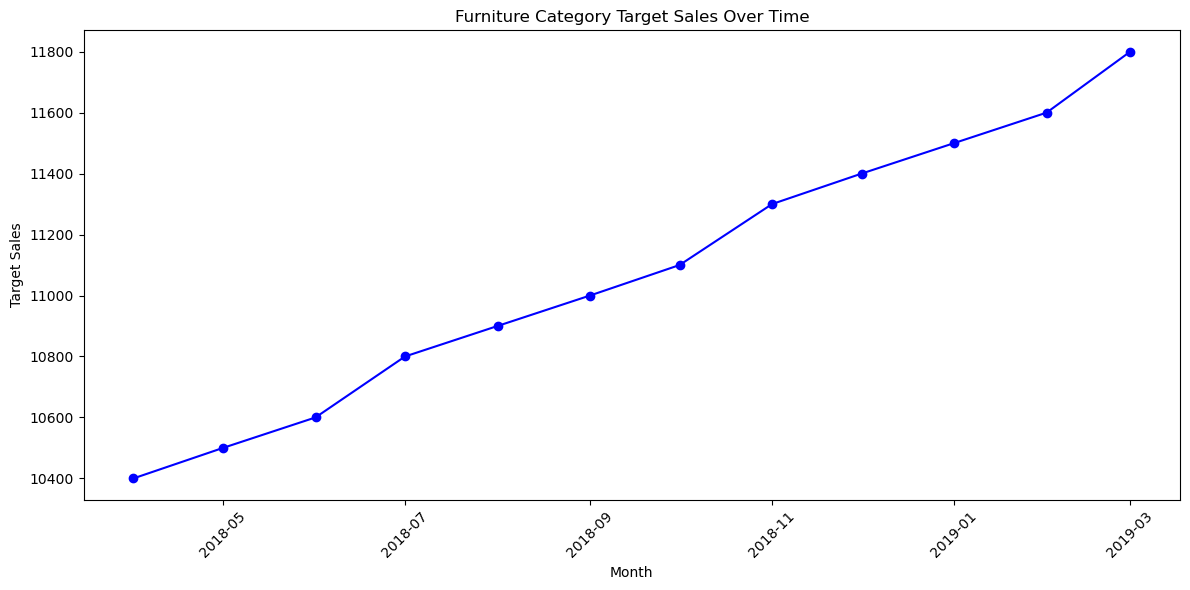

In [170]:
plt.figure()
plt.plot(furniture_target["Month of Order Date"], furniture_target["Target"], marker='o', linestyle='-', color='b')
plt.title("Furniture Category Target Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Target Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

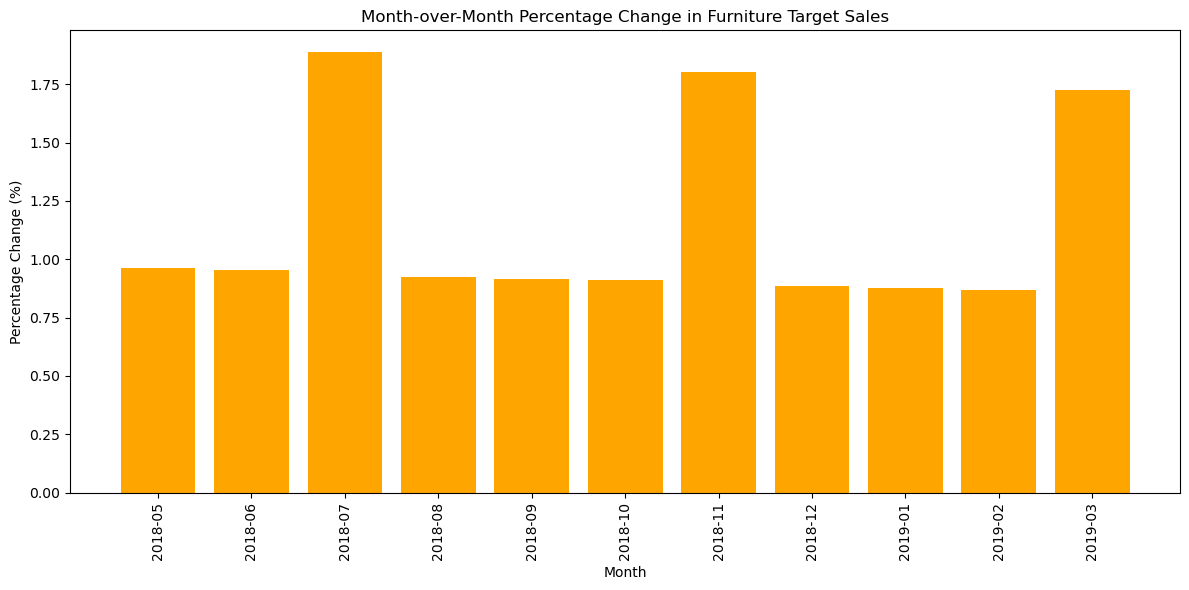

In [178]:
plt.figure()
y= furniture_target["Target_Sales_pct_change"]
plt.bar(furniture_target["Month of Order Date"].dt.strftime("%Y-%m"),y, color='orange')
plt.title("Month-over-Month Percentage Change in Furniture Target Sales")
plt.xlabel("Month")
plt.ylabel("Percentage Change (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [172]:
state_order_counts = orders["State"].value_counts().reset_index()
state_order_counts.columns = ["State", "Order_Count"]
top_states = state_order_counts.head(5)
print("\nTop 5 States by Order Count:")
print(top_states)



Top 5 States by Order Count:
            State  Order_Count
0  Madhya Pradesh          101
1     Maharashtra           90
2       Rajasthan           32
3         Gujarat           27
4          Punjab           25


In [173]:
top_state_data =regional_stats[regional_stats["State"].isin(top_states["State"])]
print("\nPerformance Metrics for Top 5 States:")
print(top_state_data)


Performance Metrics for Top 5 States:
            State  Total_Sales  Avg_Profit
0         Gujarat      21058.0    5.344828
1  Madhya Pradesh     105140.0   16.326471
2     Maharashtra      95348.0   21.296552
3          Punjab      16786.0  -10.150000
4       Rajasthan      21149.0   16.986486


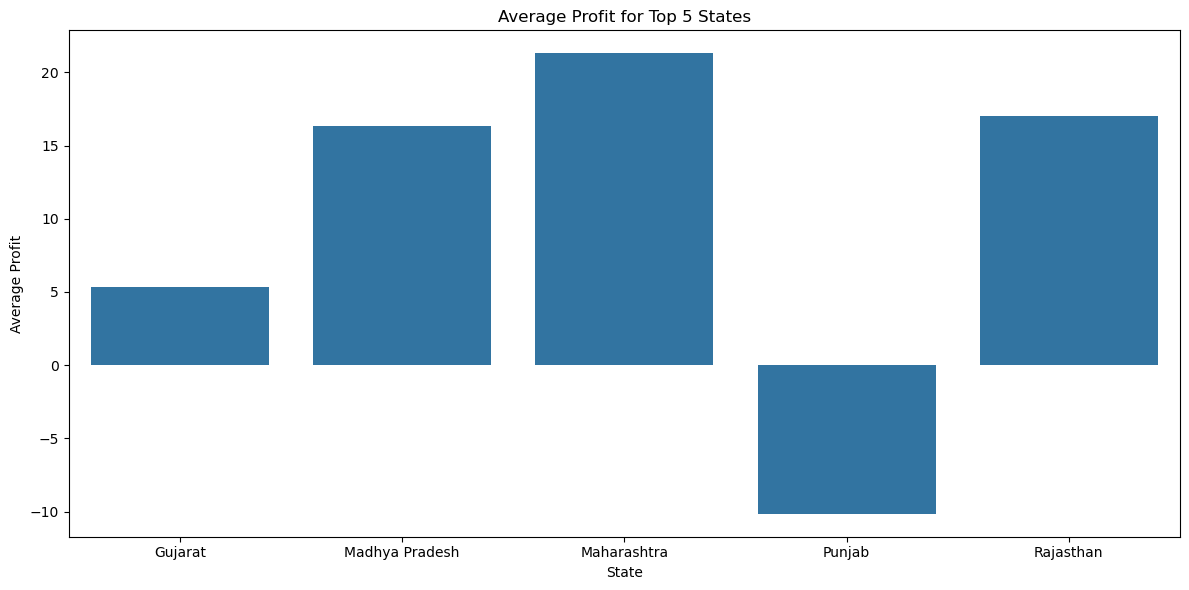

In [176]:
plt.figure()
sns.barplot(data=top_state_data, x="State", y="Avg_Profit")
plt.title("Average Profit for Top 5 States")
plt.xlabel("State")
plt.ylabel("Average Profit")
plt.tight_layout()
plt.show()

# My observation

Safe and Secure:
 Robust security measures are in place to protect your financial data, so you can trust the app with your money. What Could Be Better: Better Money 
 Insights:
  Add detailed reports that show your spending.
Easy to Use: 
   The design is straightforward and easy to use, making it really easy to navigate and use. Starts Small: You can start saving or investing with as little as ₹10, so you don't need a lot of money to get started.
   
 Clear Tracking: It displays your savings and investments in user-friendly dashboards so you always know where your money is.

Possible New Opportunities For Jar: Making Money With Jar for Everyone: Age: 10+ 

Small Loans and Credit: 
Jar could provide you with microloans or credits based on your saving patterns. Think about it as lending you a few bucks here and there when needed, including an app feature that would help decide if it's safe to lend based on complex algorithms.

Automatic Bill Payments and Expense Tracking: 
The app might give you the option of auto paying for your recurrent bill payments. It may also keep tabs on your expenses, ensuring that you have a clear picture of your expenditure.

Shopping and Online Payments Integration: 
You may also be able to use your savings or digital gold for cheaper online shopping and bill payments. It's like using saved funds to buy things without any hassle.

Fun challenges and rewards: 
Jar could be more interesting by including games and offering challenges or rewards for saving money. They could also enable their system to reward users for referring their friends to the app.

The Strong Points That Jar Can Utilize:

Automation:
They already assist in saving money automatically. They can use this expertise in facilitating the operation of these newly advanced features. 

Easy-To-Use Design:
The application is very straightforward and welcoming. Any n...

